# Example - Resampling

API Reference for `rio.clip`:

  - [DataArray.reproject](../rioxarray.rst#rioxarray.raster_array.RasterArray.reproject)
  - [Dataset.reproject](../rioxarray.rst#rioxarray.raster_dataset.RasterDataset.reproject)

In [16]:
import rioxarray

%matplotlib inline

## Load in xarray dataset

See docs for [rioxarray.open_rasterio](../rioxarray.rst#rioxarray-open-rasterio)
  
Notes:

 - `masked=True` will convert from integer to `float64` and fill with `NaN`. If this behavior is not desired, you can skip this.

In [17]:
xds = rioxarray.open_rasterio(
    "../../test/test_data/compare/small_dem_3m_merged.tif",
    masked=True,
)

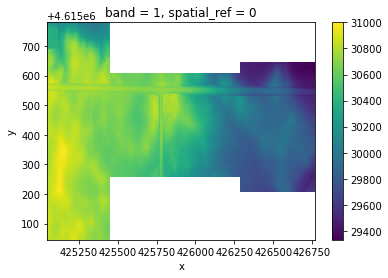

In [18]:
xds.plot()

## Resampling

In order to copy `rasterio`'s behavior stated [here](https://rasterio.readthedocs.io/en/latest/topics/resampling.html), you can:

In [19]:
from rasterio.enums import Resampling

# Reproject   
upscale_factor = 2
new_width = xds.rio.width * upscale_factor
new_height = xds.rio.height * upscale_factor
resampling=Resampling.bilinear

xds_upsampled = xds.rio.reproject(xds.rio.crs, shape=(new_height, new_width))


In [20]:
xds.shape

(1, 245, 574)

In [21]:
xds_upsampled.shape

(1, 490, 1148)

In [22]:
xds.rio.resolution()

(3.0, -3.0)

In [23]:
xds_upsampled.rio.resolution()

(1.5, -1.5)